# Data Science Research Methods_260781  

## Report_2-Physical Activity Detection


## ◉ Contents

#### 1. Introduction   
1.1 Importing Petinent Libraries  
1.2 Data Collection  
#### 2. Data Cleaning  
2.1 Removing Unnecessary Data  
2.2 Dealing with Null Values  
2.3 Calculating Resultant Vectors  
2.4 Spliting the Dataset    
#### 3. Exploratory Data Analysis  
3.1 Analysing Heart Rates  
3.2 Analysing Acceleration  
3.3 Analysing Angular Velocity  
3.4 Analysing Temperature   
3.5 Analysing All Attributes  
3.6 Correlation  
#### 4. Hypothesis Testing  
4.1 Hypothesis Test I  
4.2 Hypothesis Test II  
#### 5. Modelling  
5.1 Preparing Modelling Data  
5.2 Principal Component Analysis  
5.3 Logistic Regression Model  
5.4 Linear Support Vector Classifier  
5.5 Random Forest Classifier  
5.6 Choosing the best Model and Attributes  
5.7 Cross Validation
#### 6. Conclusion  
#### 7. References

## ◉ 1. Introduction

As the awareness for the importance of physical health grows, technology is evolving to accommodate consumers’ desires to monitor and be aware of their physical health status. To this end, several technology companies have come up with devices that can track, determine and record in real time physical activity as well as vital health readings like heart rates, blood pressure, temperature and so on. While this is good, the potential advantage of having these information has a broader range of applications.  

The aim of this project is to derive actionable insights that could be helpful in developing a hardware and/or software which can determine the amount and type of physical activity carried out by an individual. To this end, a dataset that contains data about 18 different activities, performed by 9 subjects, wearing 3 inertial measurement units (IMU) and a heart rate monitor has been provided.
Each row in each file represents one reading and contains 54 attributes. 12 out of the 18 physical activities are protocol activities, and these would be the focus of this report.

To achieve the goal stated earlier, this project would be carried out in four broad sections;

⦿Data Cleaning to make the data provided suitable to achieve the goal of this project.

⦿Exploratory Data Analysis to gain insights into what the cleaned data now holds.

⦿Hypothesis Testing to test the observations made from exploratory data analysis carried out.

⦿Supervised Machine Learning modelling to choose the best model for activity detection

All of this is necessary to derive actionable insights towards developing hardware and/or software which can determine to a good degree of accuracy, the amount and type of physical activity being carried out by an individual.

### ⦿ 1.1 Importing petinent libraries

Importing the libraries needed for this project.

In [1]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import scipy.stats as st
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import io
from nbformat import read

### ⦿ 1.2 Data Collection

As stated in the information file(readme.pdf), data collection was done by 3 inertial measurment units(IMU), a heart rate monitor and a companion unit(Viliv S5 UMPC).

The provided dataset contains 9 text files(.dat format). Each file contains records of activities performed by an individual. All 9 files would be set as data sources to be loaded. All column names for each column of data would be defined according to thier position in the dataset. There would be 54 columns as each row of data contains 54 attributes. 

Columns1-3 would contain information about time stamp, activity ID and heart rate.  
Information about temperature, acceleration, angular velocity, magnetic field and orientation from the hand, chest and ankle would be contained in columns 4 to 54.  
Columns 4-20 would contain information gotten from the IMU positioned on the wrist(referred to hand in readme.pdf).  
Columns 21-37 would contain information gotten from the IMU positioned on the chest.  
Lastly, columns 38-54 would contain information gotten from the IMU positioned on the ankle.

In [2]:
#Specifying data sources
file_list = ["PAMAP2_Dataset/Protocol/subject101.dat",
             "PAMAP2_Dataset/Protocol/subject102.dat",
             "PAMAP2_Dataset/Protocol/subject103.dat",
             "PAMAP2_Dataset/Protocol/subject104.dat",
             "PAMAP2_Dataset/Protocol/subject105.dat",
             "PAMAP2_Dataset/Protocol/subject106.dat",
             "PAMAP2_Dataset/Protocol/subject107.dat",
             "PAMAP2_Dataset/Protocol/subject108.dat",
             "PAMAP2_Dataset/Protocol/subject109.dat"]

#Creating subject IDs for each of the 9 subjects
subject_ID = list(range(1,10))

#Each file contains 54 columns per row, the columns are defined thus;

#columns 1 to 3
col1_3 = ["timeStamp", "activityID", "heartRate"]

#columns 4 to 20 were gotten from the IMU positioned on the wrist(referred to as hand)
#According to the data info each IMU sensory data contained colums as defined below;
col4_20 = ["handTemp",
            "handAcc16g_1", "handAcc16g_2", "handAcc16g_3",
            "handAcc6g_1", "handAcc6g_2", "handAcc6g_3",
            "handGyr1", "handGyr2", "handGyr3",
            "handMag1", "handMag2", "handMag3",
            "handOrient1", "handOrient2", "handOrient3", "handOrient4"]


#columns 21 to 37 were gotten from the IMU positioned on the chest
#According to the data info each IMU sensory data contained colums as defined below;
col21_37 = ["chestTemp",
            "chestAcc16g_1", "chestAcc16g_2", "chestAcc16g_3",
            "chestAcc6g_1", "chestAcc6g_2", "chestAcc6g_3",
            "chestGyr1", "chestGyr2", "chestGyr3",
            "chestMag1", "chestMag2", "chestMag3",
            "chestOrient1", "chestOrient2", "chestOrient3", "chestOrient4"]


#columns 38 to 54 were gotten from the IMU positioned on the ankle
#According to the data info each IMU sensory data contained colums as defined below;
col38_54 = ["ankleTemp",
            "ankleAcc16g_1", "ankleAcc16g_2", "ankleAcc16g_3",
            "ankleAcc6g_1", "ankleAcc6g_2", "ankleAcc6g_3",
            "ankleGyr1", "ankleGyr2", "ankleGyr3",
            "ankleMag1", "ankleMag2", "ankleMag3",
            "ankleOrient1", "ankleOrient2", "ankleOrient3", "ankleOrient4"]


#Representing Activity IDs in a dictionary, key = Activity ID, value = Activity name
#This was defined in the data info document
activity_ID_dict = {0: "other",
                    1: "lying",
                    2: "sitting",
                    3: "standing",
                    4: "walking",
                    5: "running",
                    6: "cycling",
                    7: "Nordic walking",
                    9: "watching TV",
                    10: "computer work",
                    11: "car driving",
                    12: "ascending stairs",
                    13: "descending stairs",
                    16: "vacuum cleaning",
                    17: "ironing",
                    18: "folding laundry",
                    19: "house cleaning",
                    20: "playing soccer",
                    24: "rope jumping"}


#putting all the columns together
columns = col1_3 + col4_20 + col21_37 + col38_54

#confirming the total number of column that have been created
len(columns)

54

In [3]:
#Loading the data into a data frame
pamap = pd.DataFrame()
for i in file_list:
    pamap2_data = pd.read_table(i, header=None, sep="\s+")
    #setting the dataframe columns to the defined columns according to the data info
    pamap2_data.columns = columns
    #each subject's ID is found on the 5th position counting backwards in each file name
    #adding each subject's ID to the rows so as to identify the subject related to each row
    pamap2_data["subjectID"] = int(i[-5]) 
    pamap = pamap.append(pamap2_data, ignore_index=True)

#Checking loaded dataset
display(pamap.shape)
display(pamap.head())

(2872533, 55)

,timeStamp,activityID,heartRate,handTemp,handAcc16g_1,handAcc16g_2,handAcc16g_3,handAcc6g_1,handAcc6g_2,handAcc6g_3,...,ankleGyr2,ankleGyr3,ankleMag1,ankleMag2,ankleMag3,ankleOrient1,ankleOrient2,ankleOrient3,ankleOrient4,subjectID
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


---

## ◉ 2. Data Cleaning

The loaded data would now be cleaned, missing and dirty data would be taken care of in this section. The remaining data would then be split into two parts.

In [4]:
pamap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timeStamp      float64
 1   activityID     int64  
 2   heartRate      float64
 3   handTemp       float64
 4   handAcc16g_1   float64
 5   handAcc16g_2   float64
 6   handAcc16g_3   float64
 7   handAcc6g_1    float64
 8   handAcc6g_2    float64
 9   handAcc6g_3    float64
 10  handGyr1       float64
 11  handGyr2       float64
 12  handGyr3       float64
 13  handMag1       float64
 14  handMag2       float64
 15  handMag3       float64
 16  handOrient1    float64
 17  handOrient2    float64
 18  handOrient3    float64
 19  handOrient4    float64
 20  chestTemp      float64
 21  chestAcc16g_1  float64
 22  chestAcc16g_2  float64
 23  chestAcc16g_3  float64
 24  chestAcc6g_1   float64
 25  chestAcc6g_2   float64
 26  chestAcc6g_3   float64
 27  chestGyr1      float64
 28  chestGyr2      float64
 29  chestGyr3     

### ⦿ 2.1 Removing Unnecessary Data

It was advised in the information file(readme.pdf) that some data provided should be discarded in any kind of analysis. To this end, data labeled with activity ID of 0 would be taken off. Also, acceleration data with the scale of ±6g would be dropped because the accelerometer with this scale was not precisely calibrated with that of ±16g.  
Furthermore, data with information about orientation and magnetic fields would be dropped. This is because the aim is to determine the activity being performed, the direction in which the activity is performed isn't required.

In [5]:
#removing rows that contain activity ID == 0
pamap = pamap.drop(pamap[pamap.activityID == 0].index)

#removing columns with data about Orientation of wrist(hand), chest and ankle
#removing acceleration with scale +_6g based on recommendation
pamap = pamap.drop(["handOrient1", "handOrient2", "handOrient3", "handOrient4",
                    "chestOrient1", "chestOrient2", "chestOrient3", "chestOrient4",
                    "ankleOrient1", "ankleOrient2", "ankleOrient3", "ankleOrient4",
                    "handAcc6g_1", "handAcc6g_2", "handAcc6g_3",
                    "chestAcc6g_1", "chestAcc6g_2", "chestAcc6g_3",
                    "ankleAcc6g_1", "ankleAcc6g_2", "ankleAcc6g_3",
                    "handMag1", "handMag2", "handMag3",
                    "chestMag1", "chestMag2", "chestMag3",
                    "ankleMag1", "ankleMag2", "ankleMag3"], axis=1)

### ⦿ 2.2 Dealing with Null Values

In [6]:
#Checking for null values
pamap.isnull().sum()

timeStamp              0
activityID             0
heartRate        1765464
handTemp           11124
handAcc16g_1       11124
handAcc16g_2       11124
handAcc16g_3       11124
handGyr1           11124
handGyr2           11124
handGyr3           11124
chestTemp           2420
chestAcc16g_1       2420
chestAcc16g_2       2420
chestAcc16g_3       2420
chestGyr1           2420
chestGyr2           2420
chestGyr3           2420
ankleTemp           8507
ankleAcc16g_1       8507
ankleAcc16g_2       8507
ankleAcc16g_3       8507
ankleGyr1           8507
ankleGyr2           8507
ankleGyr3           8507
subjectID              0
dtype: int64

In this section, null values would be handled according to their peculiarity.  
From the information file(readme.pdf), the heart rate monitor used has a frequency of ≈ 9Hz while the IMU used has a frequency of 100Hz. This means that the IMUs were able to provide readings every 0.01s while the heart rate monitor only provided readings in about 0.1s.  
This explains the huge number of null values present in the heart rate column. These null values would be dropped since the heart rate readings provided by the heart rate monitor sufficiently captures readings from the human heart whose frequency isn't up to 9Hz in reality. The resultant dataset would have time stamps of approximately 0.1s. 
Before dropping these null values, an extra precautionary step would be taken to convert all non numeric entries(if any is found) to null values.

In [7]:
#As an extra precautionary step, converting all nonnumeric entry found to NaN
pamap = pamap.apply(pd.to_numeric, errors = "coerce")

#removing missing heart rate values
pamap = pamap.dropna(subset = ["heartRate"])

pamap.shape

(177408, 25)

In [8]:
#Checking null values again
pamap.isnull().sum()

timeStamp           0
activityID          0
heartRate           0
handTemp         1009
handAcc16g_1     1009
handAcc16g_2     1009
handAcc16g_3     1009
handGyr1         1009
handGyr2         1009
handGyr3         1009
chestTemp         193
chestAcc16g_1     193
chestAcc16g_2     193
chestAcc16g_3     193
chestGyr1         193
chestGyr2         193
chestGyr3         193
ankleTemp         738
ankleAcc16g_1     738
ankleAcc16g_2     738
ankleAcc16g_3     738
ankleGyr1         738
ankleGyr2         738
ankleGyr3         738
subjectID           0
dtype: int64

The remaining null values would be filled by interpolation. Interpolation is a mathematical technique used to estimate the values of unknown data points that fall in between existing, known data points. This would now be used to populate the null values accordingly.

In [9]:
#Filling up NaN values through interpolation
pamap = pamap.interpolate()

#Checking for null values
pamap.isnull().sum()

timeStamp        0
activityID       0
heartRate        0
handTemp         0
handAcc16g_1     0
handAcc16g_2     0
handAcc16g_3     0
handGyr1         0
handGyr2         0
handGyr3         0
chestTemp        0
chestAcc16g_1    0
chestAcc16g_2    0
chestAcc16g_3    0
chestGyr1        0
chestGyr2        0
chestGyr3        0
ankleTemp        0
ankleAcc16g_1    0
ankleAcc16g_2    0
ankleAcc16g_3    0
ankleGyr1        0
ankleGyr2        0
ankleGyr3        0
subjectID        0
dtype: int64

### ⦿ 2.3 Calculating Resultant Vectors

Both acceleration and angular velocity are vectors. In this dataset, these two attributes have multiple representations at the same time stamp. These multiple values can be represented by a resultant value. A resultant vector is a single vector that will produce the same effect as produced by a number of vectors collectively.  
To this end, the resultant acceleration and angular velocity would be calculated as a representation of all other individual values of this attributes present per time.  
Afterwards, the multiple values would be removed from the dataset.

In [10]:
#Calculating resultant acceleration and angular velocity

pamap["handAcc"] = np.sqrt(np.power(pamap.handAcc16g_1,2)+np.power(pamap.handAcc16g_2,2)
                           +np.power(pamap.handAcc16g_3,2))
pamap["chestAcc"] = np.sqrt(np.power(pamap.chestAcc16g_1,2)+np.power(pamap.chestAcc16g_2,2)
                            +np.power(pamap.chestAcc16g_3,2))
pamap["ankleAcc"] = np.sqrt(np.power(pamap.ankleAcc16g_1,2)+np.power(pamap.ankleAcc16g_2,2)
                            +np.power(pamap.ankleAcc16g_3,2))
pamap["handGyr"] = np.sqrt(np.power(pamap.handGyr1,2)+np.power(pamap.handGyr2,2)
                           +np.power(pamap.handGyr3,2))
pamap["chestGyr"] = np.sqrt(np.power(pamap.chestGyr1,2)+np.power(pamap.chestGyr2,2)
                            +np.power(pamap.chestGyr3,2))
pamap["ankleGyr"] = np.sqrt(np.power(pamap.ankleGyr1,2)+np.power(pamap.ankleGyr2,2)
                            +np.power(pamap.ankleGyr3,2))

In [11]:
#Dropping additional columns as necessary
pamapI = pamap.drop(["handAcc16g_1", "handAcc16g_2", "handAcc16g_3",
                    "chestAcc16g_1", "chestAcc16g_2", "chestAcc16g_3",
                    "ankleAcc16g_1", "ankleAcc16g_2", "ankleAcc16g_3",
                    "handGyr1", "handGyr2", "handGyr3",
                    "chestGyr1", "chestGyr2", "chestGyr3",
                    "ankleGyr1", "ankleGyr2", "ankleGyr3"], axis = 1)
pamapI.shape

(177408, 13)

### ⦿ 2.4 Splitting Dataset

The dataset would now be split into two. One part would be used for exploratory data analysis and another part would be used for hypothesis testing.

In [12]:
#Splitting dataset

pamapII = pamapI.sample(frac=0.8, random_state=1)
pamapIII = pamapI.drop(pamapII.index)

---

## ◉ 3. Exploratory Data Analysis

In this section, the dataset pamapII would be used for exploratory data analysis to gain some insights from the dataset. First, we take a look at the data and how it's represented;

In [13]:
display(pamapII.head())
display(pamapII.describe())

,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAcc,chestAcc,ankleAcc,handGyr,chestGyr,ankleGyr
68817,696.55,3,98.0,33.0000,34.6250,33.3750,1,9.849247,9.701193,9.831735,0.055663,0.019209,0.035965
2773370,3179.34,7,117.0,30.6875,33.8125,31.8125,8,3.768636,4.899456,9.293140,0.755839,0.469348,1.119186
2622702,1672.66,12,98.0,34.3750,38.0625,34.3125,8,15.689417,14.417261,8.611949,3.647789,1.885233,4.855775
331735,3325.73,5,173.0,30.3750,33.6875,33.0000,1,11.102513,9.566765,23.534973,5.211004,3.488922,2.143105
1747730,3424.74,5,161.0,33.8125,36.4375,34.0625,5,10.947063,0.632507,16.168164,0.950638,0.724282,2.931711


,timeStamp,activityID,heartRate,handTemp,chestTemp,ankleTemp,subjectID,handAcc,chestAcc,ankleAcc,handGyr,chestGyr,ankleGyr
count,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000
mean,1705.094311,8.078034,107.490044,32.749716,36.178089,33.711993,4.565569,10.991668,10.200550,12.404378,1.515040,0.520830,1.429680
std,1093.879660,6.175274,26.990819,1.794006,1.494018,1.091315,2.335595,5.732630,3.867411,7.766630,1.715356,0.593134,1.913037
min,31.220000,1.000000,57.000000,24.875000,31.937500,30.000000,1.000000,0.278204,0.220936,0.326540,0.001588,0.001402,0.000579
25%,742.772500,3.000000,86.000000,31.687500,35.187500,33.000000,2.000000,9.444194,9.471611,9.859592,0.168618,0.095711,0.058374
50%,1479.530000,6.000000,105.000000,33.125000,36.437500,34.062500,5.000000,9.800118,9.829702,10.045199,0.986604,0.368505,0.537875
75%,2665.130000,13.000000,124.000000,34.062500,37.437500,34.500000,7.000000,11.276136,10.402262,11.730005,2.240869,0.706778,2.140915
max,4245.650000,24.000000,202.000000,35.500000,38.562500,35.437500,9.000000,178.922859,127.143562,200.641542,19.163110,15.775153,14.580009


Since 12 activities out of the 18 total activities are protocol activities being considered, these would now be stored in a list for reference purposes.

In [14]:
#Getting a list of Protocol Activities
activity_list = pamapII.heartRate.groupby(pamapII.activityID).mean()
activity_list.index = activity_list.index.map(activity_ID_dict)
protocol_activities = list(activity_list.index)
print(protocol_activities)

['lying', 'sitting', 'standing', 'walking', 'running', 'cycling', 'Nordic walking', 'ascending stairs', 'descending stairs', 'vacuum cleaning', 'ironing', 'rope jumping']


### ⦿ 3.1 Analysing Heart Rates

Heart rate is the frequency of the heartbeat measured by the number of contractions(beats) of the heart per minute $bpm$. To continue in this section, first the distribution of the heart rates relative to the activities would be examined.

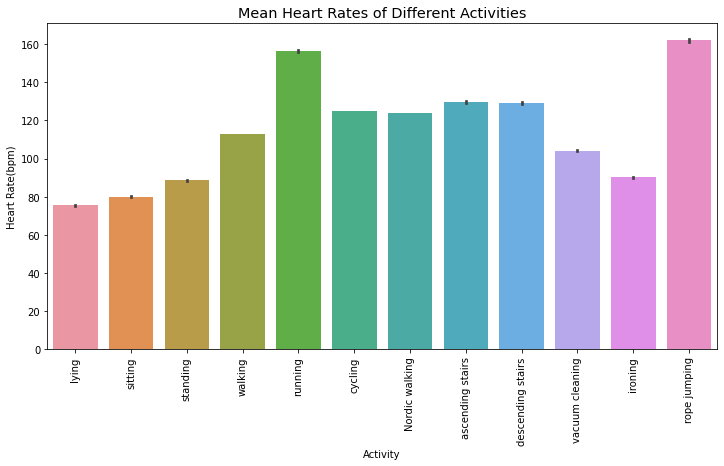

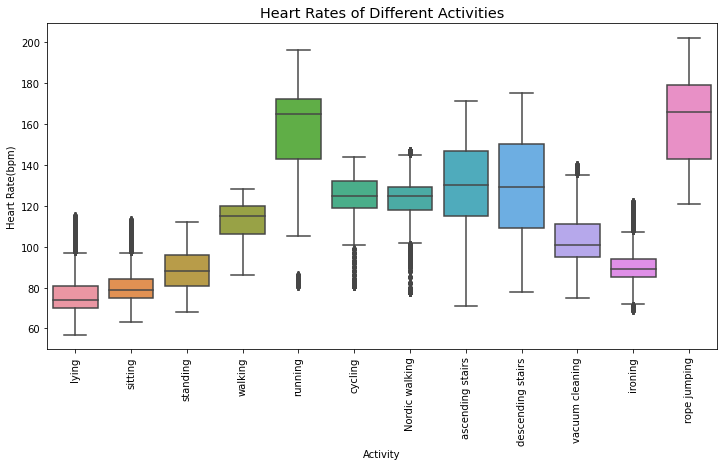

In [15]:
#Visualising the heartrates data
plt.subplots(figsize=(12,6))
p1 = sns.barplot(data=pamapII, x="activityID",y="heartRate")
p1.set_title("Mean Heart Rates of Different Activities", fontsize=14.5)
p1.set_xticklabels(protocol_activities, rotation=90)
p1.set_xlabel("Activity")
p1.set_ylabel("Heart Rate(bpm)")
plt.show()

plt.subplots(figsize=(12,6))
b1 = sns.boxplot(data=pamapII, x="activityID",y="heartRate")
b1.set_title("Heart Rates of Different Activities", fontsize=14.5)
b1.set_xticklabels(protocol_activities, rotation=90)
b1.set_xlabel("Activity", size=10)
b1.set_ylabel("Heart Rate(bpm)", size=10)
plt.show()

The charts above show that activities that aren't vigorous like sitting, lying, standing and ironing have mean heart rates that are close to the normal resting human heart rate of between 60-100 $bpm$. Slightly more vigorous activities like walking, cycling, nordic walking, ascending and descending stairs have mean heart rates of around 120bpm. The most vigorous activities(running and rope jumping) have heart rates of around 160bpm with rope jumping being closest to this figure. However, lying has the least mean heart rate of all activities. 

### ⦿ 3.2 Analysing Acceleration

Acceleration is the rate of change of velocity of an object with respect to time, measured in metre per square second $m/s^{2}$. In this section, the mean acceleration at every location(hand, chest and ankle) would be  considered according to the kind of activity they were recorded against.

In [16]:
#Grouping the mean acceleration of each location by the activity ID
mean_handAcc = pamapII.handAcc.groupby(pamapII.activityID).mean()
mean_chestAcc = pamapII.chestAcc.groupby(pamapII.activityID).mean()
mean_ankleAcc = pamapII.ankleAcc.groupby(pamapII.activityID).mean()

mean_handAcc.index = mean_handAcc.index.map(activity_ID_dict)
mean_chestAcc.index = mean_chestAcc.index.map(activity_ID_dict)
mean_ankleAcc.index = mean_ankleAcc.index.map(activity_ID_dict)

#Concatenating all mean acceleration of hand, chest and ankle
mean_acc = pd.concat([mean_handAcc,mean_chestAcc,mean_ankleAcc], axis=1)

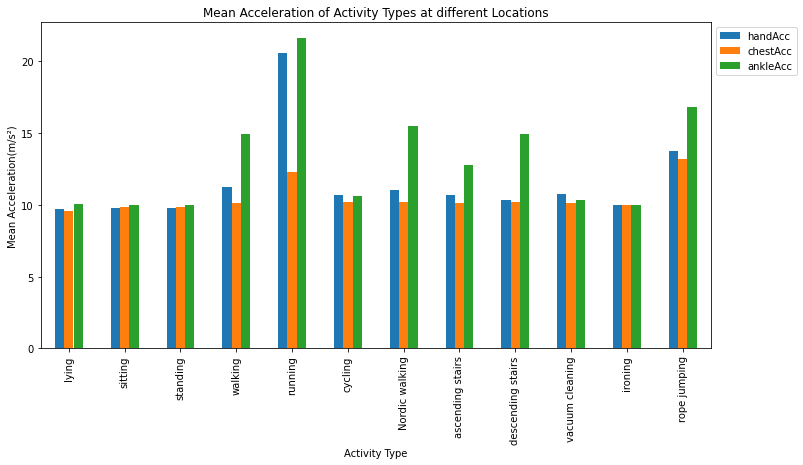

In [17]:
#Visualising Acceleration of activities at different locations.
mean_acc.plot(kind="bar", figsize=(12,6))
plt.title("Mean Acceleration of Activity Types at different Locations")
plt.ylabel("Mean Acceleration(m/s²)")
plt.xlabel("Activity Type")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

From the chart above, vigorous activities like running and rope jumping have higher accelerations at the hand and ankle than the other activities. The least vigorous activities in the list have the lowest accelerations. This is expected as the speed of performance of these activities would be dependent of their acceleration. Also, it can be seen that activities with a considerable amout of leg movement(walking, nordic walking, ascending and descending stairs) have visibly higher acceleration at the ankle.  
This is not the case in cycling because there is no displacement between the foot and pedal, the foot is on the pedal at every point during the process. For the other activities in this category, the foot is off the ground for a brief moment of time.

### ⦿ 3.3 Analysing Velocity

Angular velocity or rotational vector, also known as anngular frequency vector is a representation of how quickly an object rotates or revolves relative to a point or axis, measured in radians per second $rad/s$. The mean angular velocity at each location(hand, chest and ankle) would be considered according to the kind of activity they were recorded against.

In [18]:
#Grouping the mean angular velocity of each location by the activity ID
mean_handGyr = pamapII.handGyr.groupby(pamapII.activityID).mean()
mean_chestGyr = pamapII.chestGyr.groupby(pamapII.activityID).mean()
mean_ankleGyr = pamapII.ankleGyr.groupby(pamapII.activityID).mean()

mean_handGyr.index = mean_handGyr.index.map(activity_ID_dict)
mean_chestGyr.index = mean_chestGyr.index.map(activity_ID_dict)
mean_ankleGyr.index = mean_ankleGyr.index.map(activity_ID_dict)


#Concatenating all mean angular velocity of hand, chest and ankle
mean_gyr = pd.concat([mean_handGyr, mean_chestGyr, mean_ankleGyr], axis=1)

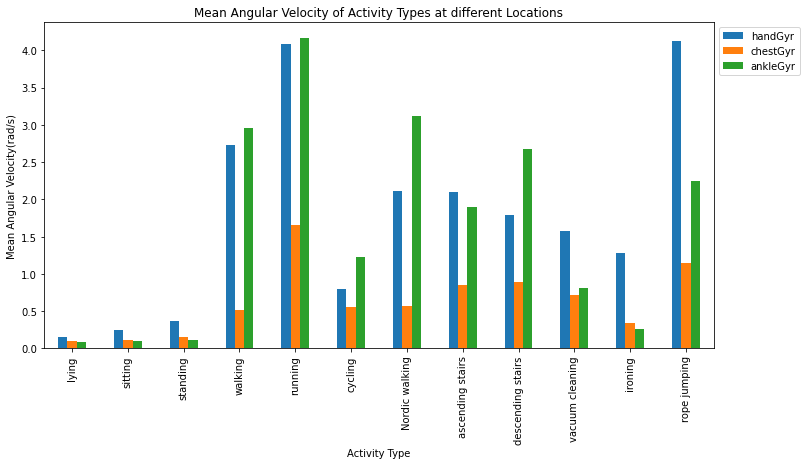

In [19]:
#Visualising angular velocity of activities at different locations.
mean_gyr.plot(kind="bar", figsize=(12,6))
plt.title("Mean Angular Velocity of Activity Types at different Locations")
plt.ylabel("Mean Angular Velocity(rad/s)")
plt.xlabel("Activity Type")
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

According to this chart, it can be observed that, the least vigorous activities have the least angular velocities at all locations. However, ironing and vacuum cleaning have considerably high angular velocities at the hand, this can be explained as a result of the hand movements involved in both activities.  
The more vigorous activities have higher angular velocities as expected. Running has similar angular velocities at the hand and ankle, this is so because both the hands and feet experience similar amounts of displacements. For rope jumping, the hand has a higher angular velocity than the ankle because the wrist would naturally experience higher levels of displacements during this activity.  
Also, it can be seen that descending the stairs had more angular velocity at the ankle than ascending.


### ⦿ 3.4 Analysing Temperature

Temperature is a physical quantity that expresses quantitatively, the perceptions of hotness and coldness. The temperature readings in the dataset has been given in Celcius $°C$. The temperature readings at different locations(hand, chest and ankle) would now be analysed to draw insights.

##### ✲ Hand

In [20]:
#Grouping temperature measurements at the hand
hand_temp = pamapII.handTemp.groupby(pamapII.activityID)
summary = hand_temp.describe()
summary.index = hand_temp.describe().index.map(activity_ID_dict)
summary

,count,mean,std,min,25%,50%,75%,max
activityID,,,,,,,,
lying,14101.0,32.732067,1.404955,30.1875,31.3125,32.8750,33.8125,34.9375
sitting,13503.0,33.266162,1.103005,31.5000,32.1875,33.5000,34.2500,35.0625
standing,13927.0,33.638916,0.855892,32.1875,33.0000,33.5625,34.2500,35.2500
walking,17403.0,32.294685,1.378107,28.6875,31.3125,32.5625,33.0625,34.8750
running,7131.0,30.815160,2.095377,27.9375,28.8125,30.8125,33.8125,33.8750
cycling,12027.0,31.007691,1.994362,27.5625,29.3125,31.0625,32.7500,34.6875
Nordic walking,13818.0,31.527517,1.752760,28.9375,30.3125,30.7500,33.0000,34.9375
ascending stairs,8601.0,33.527744,0.873469,31.7500,32.5625,33.7500,34.1250,35.1250
descending stairs,7585.0,33.322322,0.882146,31.5625,32.4375,33.5625,33.8750,34.8750


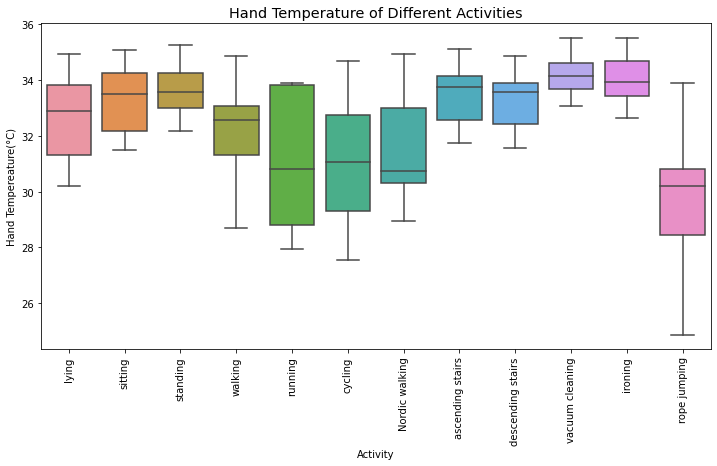

In [21]:
plt.subplots(figsize=(12,6))
b1 = sns.boxplot(data=pamapII, x="activityID",y="handTemp")
b1_xaxis = list(summary.index)
plt.title("Hand Temperature of Different Activities", fontsize=14.5)
b1.set_xticklabels(b1_xaxis, rotation=90)
b1.set_xlabel("Activity")
b1.set_ylabel("Hand Tempereature(°C)")
plt.show()

##### ✲ Chest

In [22]:
#Grouping temperature measurements at the chest
chest_temp = pamapII.chestTemp.groupby(pamapII.activityID)
summary = chest_temp.describe()
summary.index = chest_temp.describe().index.map(activity_ID_dict)
summary

,count,mean,std,min,25%,50%,75%,max
activityID,,,,,,,,
lying,14101.0,35.093265,1.560447,32.1875,33.6250,34.9375,36.6875,37.4375
sitting,13503.0,35.829001,1.254178,33.6875,34.8125,35.7500,37.0000,37.6250
standing,13927.0,36.165968,1.068390,34.3125,35.2500,35.9375,37.4375,37.6875
walking,17403.0,37.004439,0.826353,35.2500,36.4375,37.1250,37.6250,38.4375
running,7131.0,34.400110,1.434701,32.0625,33.3750,34.0625,36.3750,36.8125
cycling,12027.0,35.724937,1.601728,32.8125,34.5000,35.3750,37.3750,38.3125
Nordic walking,13818.0,36.149393,1.673125,33.7500,34.8125,35.6875,38.3125,38.5625
ascending stairs,8601.0,37.054739,0.869834,35.1875,36.6875,36.8750,37.8125,38.1875
descending stairs,7585.0,37.016809,0.787120,35.4375,36.6875,36.7500,37.8125,38.0000


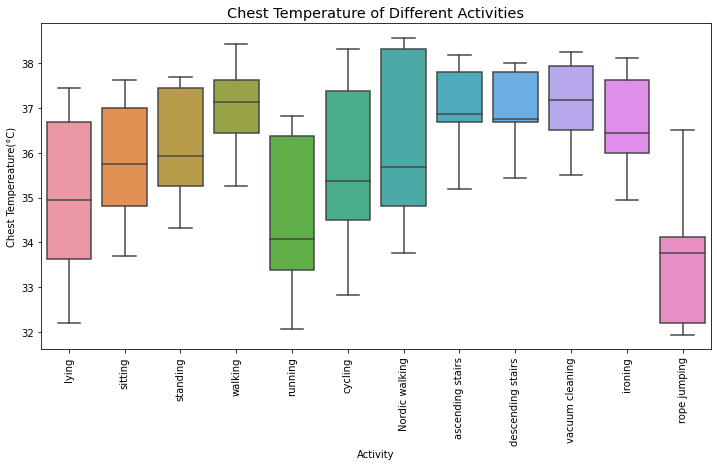

In [23]:
#Visualising chest temperatures for different activities
plt.subplots(figsize=(12,6))
b1 = sns.boxplot(data=pamapII, x="activityID",y="chestTemp")
b1_xaxis = list(summary.index)
plt.title("Chest Temperature of Different Activities", fontsize=14.5)
b1.set_xticklabels(b1_xaxis, rotation=90)
b1.set_xlabel("Activity")
b1.set_ylabel("Chest Tempereature(°C)")
plt.show()

##### ✲ Ankle

In [24]:
##Grouping temperature measurements at the ankle
ankle_temp = pamapII.ankleTemp.groupby(pamapII.activityID)
summary = ankle_temp.describe()
summary.index = ankle_temp.describe().index.map(activity_ID_dict)
summary

,count,mean,std,min,25%,50%,75%,max
activityID,,,,,,,,
lying,14101.0,32.981105,1.422343,30.0000,31.6875,33.5000,34.1250,34.6875
sitting,13503.0,33.640865,0.951201,31.2500,32.8750,33.8750,34.2500,34.7500
standing,13927.0,33.896652,0.835660,31.8125,33.3125,34.0625,34.7500,34.9375
walking,17403.0,33.840933,0.916256,31.8750,33.1875,34.1875,34.5625,35.0000
running,7131.0,33.143160,0.949214,31.5625,31.9375,33.3125,34.0000,34.1250
cycling,12027.0,33.170561,0.875187,31.8125,32.3750,33.0625,34.0000,34.5000
Nordic walking,13818.0,33.444321,1.028784,31.7500,32.5000,34.0625,34.3125,34.8125
ascending stairs,8601.0,34.176349,0.858808,32.3750,33.5625,34.2500,34.9375,35.4375
descending stairs,7585.0,34.174868,0.803976,32.2500,33.6250,34.1875,34.8750,35.1875


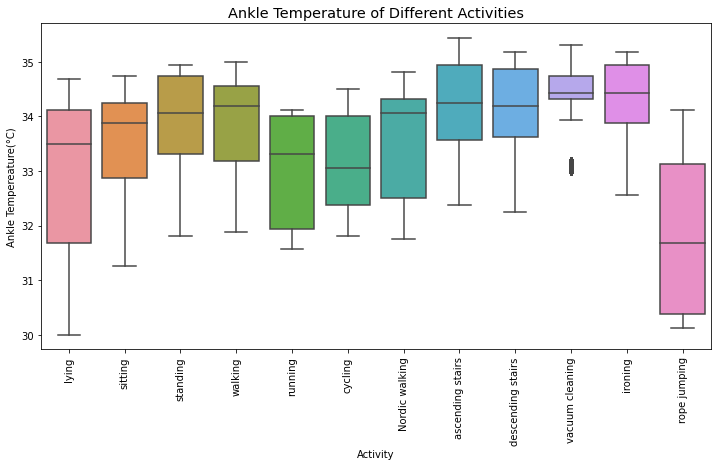

In [25]:
#Visualising ankle temperatures for different activities
plt.subplots(figsize=(12,6))
b1 = sns.boxplot(data=pamapII, x="activityID",y="ankleTemp")
b1_xaxis = list(summary.index)
plt.title("Ankle Temperature of Different Activities", fontsize=14.5)
b1.set_xticklabels(b1_xaxis, rotation=90)
b1.set_xlabel("Activity")
b1.set_ylabel("Ankle Tempereature(°C)")
plt.show()

The mean temperature at the hand is highest for vacuum cleaning at 34.18°C, possibly as a result of the hot air emitted by the vacuum cleaner during this activity. All other activity in this category that are not vigorous had similar temperatures.  
Interestingly, activities that requires vigorous movement of the hands(running, cycling, nordic walking and rope jumping) had lesser mean temperatures(30.82°C, 30.98°C, 31.52°C and 29.75°C respectively) at the hand compared to other activities. This would be because of the high movement of air around the hand during these activities.  
It is also good to note the high temperature variance for rope jumping and the low temperature variance for vacuum cleaning.  
Rope jumping also had the least mean temperature for the chest and ankle sensors, while vacuum cleaning maintained the highest mean temperature at these locations.

### ⦿ 3.5 Analysing all Attributes

This section of the report would look at the mean values of the attributes of the dataset per subject. Each subject's mean readings would be analysed for further insights.

In [26]:
#Checking the mean attributes reading from all activities per subject
attributes_mean = pamapII.pivot_table(index="subjectID")
attributes_meanI = attributes_mean.drop(["activityID","timeStamp"], axis=1)
attributes_meanI

,ankleAcc,ankleGyr,ankleTemp,chestAcc,chestGyr,chestTemp,handAcc,handGyr,handTemp,heartRate
subjectID,,,,,,,,,,
1,12.613012,1.400300,33.667876,10.302390,0.579408,35.238564,11.179297,1.688628,32.423884,122.302059
2,12.160482,1.517965,34.254049,10.224044,0.596029,36.329774,10.818192,1.835693,32.332976,109.592873
3,11.786505,0.999310,33.530801,9.940457,0.395654,35.800403,10.682006,1.468212,31.887581,95.046416
4,11.581570,1.162349,33.581195,9.994052,0.451524,35.125472,10.279740,1.189798,31.909696,109.357853
5,12.846668,1.608244,34.203253,10.329820,0.546795,37.442117,11.095179,1.522842,34.768169,108.474464
6,12.578789,1.563441,34.720111,10.183602,0.609790,35.827700,11.939162,1.681059,32.289608,103.068764
7,12.481160,1.445724,32.235016,10.026194,0.412709,36.766594,10.414043,1.042343,32.949067,96.339431
8,12.772193,1.545705,33.349282,10.411444,0.505248,36.707491,11.253402,1.561773,33.159516,109.839771
9,17.521260,2.210743,31.424601,12.644138,1.051567,32.239495,14.087466,3.067980,25.054920,148.755319


As seen from the table above, subject 9 had the highest readings in acceleration, angular velocity and heart rate, and the lowest reading in the temperature data. This can be explained by the fact that subject 9 only performed one protocol activity(rope jumping). If rope jumping alone was considered for every other subjet that participated, then the values would be within a close range to each other.

In [27]:
#Checking the mean attributes reading from Rope jumping per subject
rope_jumping_mean = pamapII[(pamapII.activityID==24)]
rope_jumping_meanI = rope_jumping_mean.pivot_table(index="subjectID")
rope_jumping_meanII = rope_jumping_meanI.drop(["activityID","timeStamp"], axis=1)
rope_jumping_meanII

,ankleAcc,ankleGyr,ankleTemp,chestAcc,chestGyr,chestTemp,handAcc,handGyr,handTemp,heartRate
subjectID,,,,,,,,,,
1,17.594261,2.340482,33.141618,13.468580,1.177150,33.776947,12.745626,3.223048,30.194849,165.853814
2,13.489960,1.796130,30.282804,11.749932,1.374665,32.102073,13.549406,4.766294,28.419495,156.306736
5,16.979036,1.951852,34.094184,13.970755,0.888983,36.436740,15.116642,4.743237,33.817600,163.340278
6,9.930778,0.045433,33.937500,9.844180,0.119786,33.312500,9.826498,0.194711,27.976974,131.473684
8,20.205068,3.107650,31.689513,14.576782,1.106286,34.133244,14.066359,4.843526,30.825441,174.322086
9,17.521260,2.210743,31.424601,12.644138,1.051567,32.239495,14.087466,3.067980,25.054920,148.755319


### ⦿ 3.6 Correlation

To check the correlation between attributes, spearman correlation method would be used. This is preferred in the event that a monotonic relationship exists between variables. Also, spearman correlation is preferred because the data provided has a non-normal distribution.

In [28]:
#Removing activity ID, subject ID and timestamp form the dataset
pamapII_corr = pamapII.drop(["activityID", "subjectID", "timeStamp"], axis=1)

pamapII_corr.corr(method = "spearman").style.background_gradient()

,heartRate,handTemp,chestTemp,ankleTemp,handAcc,chestAcc,ankleAcc,handGyr,chestGyr,ankleGyr
heartRate,1.000000,-0.346925,-0.040121,-0.056197,0.168648,0.086825,0.254717,0.609616,0.645223,0.692476
handTemp,-0.346925,1.000000,0.743749,0.503030,-0.116877,0.020019,-0.113165,-0.157177,-0.138704,-0.254107
chestTemp,-0.040121,0.743749,1.000000,0.451462,-0.045319,0.073205,0.043990,0.120575,0.094162,0.125284
ankleTemp,-0.056197,0.503030,0.451462,1.000000,-0.007623,0.048268,-0.043878,0.122279,0.075102,-0.006643
handAcc,0.168648,-0.116877,-0.045319,-0.007623,1.000000,0.386504,0.165352,0.238789,0.214349,0.171814
chestAcc,0.086825,0.020019,0.073205,0.048268,0.386504,1.000000,0.199923,0.063910,0.130067,0.093713
ankleAcc,0.254717,-0.113165,0.043990,-0.043878,0.165352,0.199923,1.000000,0.209017,0.244250,0.383080
handGyr,0.609616,-0.157177,0.120575,0.122279,0.238789,0.063910,0.209017,1.000000,0.718811,0.694865
chestGyr,0.645223,-0.138704,0.094162,0.075102,0.214349,0.130067,0.244250,0.718811,1.000000,0.723575
ankleGyr,0.692476,-0.254107,0.125284,-0.006643,0.171814,0.093713,0.383080,0.694865,0.723575,1.000000


Observations from the correlation table above show that there is a positive correlation between angular velocity attributes at all locations(hand, chest and ankle) and heart rate.  
The temperature attributes are positively correlated with each other at every location(hand, chest and ankle). However, all temprature attributes show a negative correlation with heart rate, the strongest negative correlation was at the hand with a -0.35 correlation score.  
Also, angular velocity attributes showed a strong correlation with each other at every location(hand, chest and ankle).
Finally, acceleration attributes showed a positive correlation with each other at every location(hand, chest and ankle) and also with the heart rate. The correlation scores for acceleration are not strong enough to be considered for further analysis.

---

## ◉ 4. Hypothesis Test

From the exploratory data analysis carried out in the last section, a couple of observations were made. In this section, two hypothesis would be developed and tested based on these observations.  

To carry out the required hypothesis tests, the pamapIII dataset would be utilized.

### ⦿ 4.1 Hypothesis Test I

Hypothesis: If there is a relationship between activities and heart rates, then vigorous activities would always produce high heart rates.

Independent Variable: Vigorous activity  
Dependent Variable: Heart rate  

First of, a confidence interval of 95% would be constructed to determine the range of heart rates of the population when vigorous activities are performed.

#### ✲ Preparing the Data

For the first hypothesis test, all dataset labelled with activity ID of 5(running) and 24(rope jumping) would be considered for this test. 

In [29]:
#Getting Data
vigorous_activity = pamapIII[(pamapIII.activityID == 5) | (pamapIII.activityID == 24)]
#Checking sample size
len(vigorous_activity)

2644

In [30]:
#Calculating confidence interval of 95%
(x,y) = st.norm.interval(alpha=0.95, loc=np.mean(vigorous_activity.heartRate), 
                         scale=st.sem(vigorous_activity.heartRate))

print(f"95% confident that the mean heart rate of the population performing vigorous activities \nwould be between {round(x,2)}bpm and {round(y,2)}bpm")

95% confident that the mean heart rate of the population performing vigorous activities 
would be between 157.72bpm and 159.43bpm


The above hypothesis would now be tested classically using a mean test as follows; 

The mean heart rate of the population while performing vigorous activities would be greater than 158.63bpm.  

Null Hypothesis, $H_{0}:µ<158.63bpm$  
Alternate Hypothesis, $H_{1}:µ>158.63bpm$

For this test, a statistical significance of 0.05 would be used.

In [31]:
#Using a normal distribution to obtain z-value 
null_mean=x
sample_mean=vigorous_activity.heartRate.mean()
sample_SD=vigorous_activity.heartRate.std()
size=len(vigorous_activity.heartRate)

z_value=(sample_mean-null_mean)/(sample_SD/np.power(size,0.5))

#Calculating p-value
p_value=1-stats.norm.cdf(z_value)
print(f"The probability value obtained is: {p_value}")

The probability value obtained is: 0.024999999999998912


From the p-value(~0.025) above, there is strong evidence against the null hypothesis, as there is less than a 5% probability the null hypothesis is correct. So the null hypothesis will be rejected and the alternative hypothesis which suggests that "the mean heart rate of the population while performing vigorous activity will be greater than 158.63bpm" is then accepted.

### ⦿ 4.2 Hypothesis Test II

Hypothesis: If there is a correlation between angular velocity and heart rates, then higher angular velocities will produce higher heart rates.  

Independent Variable: Angular velocity
Dependent Variable: Heart rate

First of, a confidence interval of 95% would be constructed to determine the range of heart rates of the population when the angular velocity from their motion is high.

#### ✲ Preparing the Data

For the second hypothesis test, all data with angular velocity values greater than the mean angular velocities of the hand, chest and ankle would be considered for this test. The value considered as "high angular velocity" is relative to the mean values of angular velocities recorded from the dataset provided for this report.

In [32]:
#Getting Data
high_angVel = pamapIII[(pamapIII.handGyr > (pamapIII.handGyr.mean())) &
                       (pamapIII.chestGyr > (pamapIII.chestGyr.mean())) &
                       (pamapIII.ankleGyr > (pamapIII.ankleGyr.mean()))]

#Checking sample size
len(high_angVel)

5260

In [33]:
#Calculating confidence interval of 95%
(x,y) = st.norm.interval(alpha=0.95, loc=np.mean(high_angVel.heartRate), 
                         scale=st.sem(high_angVel.heartRate))

print(f"95% confident that the mean heart rate of the population when their motion produces a high \nangular velocity would be between {round(x,2)} and {round(y,2)}")

95% confident that the mean heart rate of the population when their motion produces a high 
angular velocity would be between 134.44 and 135.8


The above hypothesis would now be tested classically using a mean test as follows; 

The mean heart rate of the population with angular velocities above the population mean will be greater than 134.83bpm.  

Null Hypothesis, $H_{0}:µ<134.83bpm$  
Alternate Hypothesis, $H_{1}:µ>134.83bpm$

For this test, a statistical significance of 0.05 would be used.

In [34]:
#Classical HT2
null_mean=x
sample_mean=high_angVel.heartRate.mean()
sample_SD=high_angVel.heartRate.std()
size=len(high_angVel.heartRate)

z_value=(sample_mean-null_mean)/(sample_SD/np.power(size,0.5))

p_value=1-stats.norm.cdf(z_value)
print(f"The probability value obtained is: {p_value}")

The probability value obtained is: 0.025000000000001577


From the p-value(~0.025) above, there is strong evidence against the null hypothesis, as there is less than a 5% probability the null hypothesis is correct. So the null hypothesis will be rejected and the alternative hypothesis which suggests that "the mean heart rate of the population with angular velocities above the population mean will be greater than 134.83bpm" is then accepted.

---

## ◉ 5. Modelling

As stated earlier, the aim of this report is to gain actionable insights that would aid the development of a hardware and/or software that can predict the activity performed by an individual. In this section, different models would be developed and tested to ascertain their prediction accuracy(of activities being performed) as well as efficiency(of the model itself). The most efficient model would be one that can produce accurate results using the least recourses within a good time frame. In this report, three supervised learning models would be explored. The reason for using supervised learning models is because the activities that will be predicted are already known and as such a comparison can be done between the actual and predicted activities to check for accuracy and precision of the model. If a model has a good accuracy and precision score, the underlying function it uses to make predictions can then be used for the software of the device that will be developed for the purpose of predicting physical activities.

To begin, a function would be defined to display a model's accuracy, precision, recall and f1 scores.

The Accurracy of a model is the ***number of correct predictions/number of all predictions***  
The Precision of a model is the ***number of correctly predicted positive instances/number of total positive predictions made***  
The Recall of model is ***number of correctly predicted positive instances/number of total positive instances in the dataset***  
The F1 of a model is combines Precision and Recall in the ratio ***2 x [(precision x recall)/(precision + recall)]***

In [35]:
#Defining a function to get accuracy, precision, recall and F1 score of a model on a dataset

def metric_detail(actual, predicted):
    a = accuracy_score(actual, predicted)
    #Calculating Average Prediction
    p = precision_score(actual, predicted, average=None).mean()
    #Calculating Average Recall
    r = recall_score(actual, predicted, average=None).mean()
    #Calculating Average F1 score
    f = f1_score(actual, predicted, average=None).mean()
    
    print(f"Model Accuracy: {round(a*100,2)}% \nModel Precision: {round(p*100,2)}% \nModel Recall: {round(r*100,2)}% \nModel F1: {round(f*100,2)}%")

Next, a function to show the confusion matrix of the model's predicted values versus the actual values.  
In supervised machine learning, a confusion matrix is a visualisation of the performance of a model. Each row of the confusion matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

In [36]:
def plot_confusion_matrix(actual,predicted,classifier=""):
    plt.rcParams["figure.figsize"] = (18,10)
    display = sns.heatmap(confusion_matrix(actual,predicted),
                cmap="Blues",annot=True,fmt="d")
    display.set_xticklabels(protocol_activities,rotation=90)
    display.set_yticklabels(protocol_activities,rotation=0)
    plt.title(classifier, fontsize=15)
    plt.xlabel("Predicted Values", size=13)
    plt.ylabel("Actual Values", size=13)
    plt.show()
    

### ⦿ 5.1 Preparing Modelling Data  

The dataset that would be used in this section is the original cleaned dataset pamapI. The "timeStap" and "subjectID" columns would be dropped as they won't be necessary for prediction. The aim is to determine the activity being performed, the subject or the time isn't required. To this end, the "activityID" column would removed and stored in a separate dataframe(pamap_targ) while the remaining columns would be stored as "pamap_feat". This is to help the models determine what attribute is to be predicted.  
Both dataframes would be parsed into the train_test_split function(from sklearn.model_selection class). This would have the dataset in a format that the models can use for prediction.

In [37]:
#shuffling original dataset
pamapIV = pamapI.sample(frac=1,random_state=35)

#Dropping timeStamp and subjectID from the dataset
pamapV = pamapIV.drop(["timeStamp","subjectID"], axis=1)


#creating a features dataframe
pamap_feat = pamapV.drop(["activityID"], axis=1)

#creating a target dataframe
pamap_targ = pamapV["activityID"]

#RobustScaler used as data is skewed
scaler = RobustScaler()

#train test split
x_train, x_test, y_train, y_test = train_test_split(pamap_feat, pamap_targ, test_size=0.2,
                                                    random_state=45)

#scaling train dataset
x_train = scaler.fit_transform(x_train)

#scaling test dataset using the same scalar object
x_test = scaler.transform(x_test)

### ⦿ 5.2 Principal Component Analysis  

Principal Component Analysis(PCA) is a technique for reducing the dimensionality of a dataset. Large datasets containing a high number of dimensions can be reduced while preserving the maximum amout of information necessary to reconstruct the original dataset.  For this report, the x_train and x_test scaled data would be reduced using PCA into $n$ columns. The aim here would be to achieve the same result using these $n$ columns as if the whole dataset had been parsed into the model.

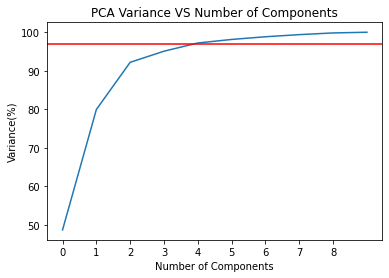

In [38]:
#setting up PCA object
pca = PCA()

#Fitiing the train dataset
pca.fit(x_train)
#Accounting for the amount of variance that would be captured by n components
var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

#Visualising variance and number of components
plt.plot(var)
plt.title("PCA Variance VS Number of Components")
plt.ylabel("Variance(%)")
plt.xlabel("Number of Components")
plt.xticks(range(0,9),range(0,9))
#The intersection between this line and "var" would indicate the number of components
#to consider in order to capture a 97% variance
plt.axhline(97, color="red")
plt.show()

From the plot above, 4 components would be required to get a 97% variance

In [39]:
#Reducing to the 4 components needed to represent the dataset
pca = PCA(n_components=4)

#Fitting x_train
x_trainPCA = pca.fit_transform(x_train)

#Transformingx_test with the same PCA object
x_testPCA = pca.transform(x_test)

### ⦿ 5.3 Logistic Regression Model  
The first model that would be built and tested is the Logistic Regression model. Logistic regression estimates the parameters of a logistic model(statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables).  
First the model object is created, then trained with the train dataset. Next the model would be used to predict the activity ID, and finally the model's metrics would be presented for analysis.  

This model would first be trained and tested with the whole train/test dataset and then the model would be trained and tested with the PCA dataset.

#### ✲ Logistic Regression

In [40]:
%%time
#Creating Model Object
LR_model = LogisticRegression()
#Fitting train data into the LR model for training
LR_model.fit(x_train,y_train)

CPU times: user 25.8 s, sys: 7.1 s, total: 32.9 s
Wall time: 4.53 s


LogisticRegression()

In [41]:
%%time
#Using LR model to predict activities
LR_model_yPred = LR_model.predict(x_test)
print(len(LR_model_yPred))
print(len(y_test))
print(LR_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[ 7 13  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64
CPU times: user 14.8 ms, sys: 7.14 ms, total: 22 ms
Wall time: 3.58 ms


In [42]:
#Checking the results of the prediction using the LR model
metric_detail(y_test,LR_model_yPred)

Model Accuracy: 62.04% 
Model Precision: 61.17% 
Model Recall: 60.28% 
Model F1: 60.29%


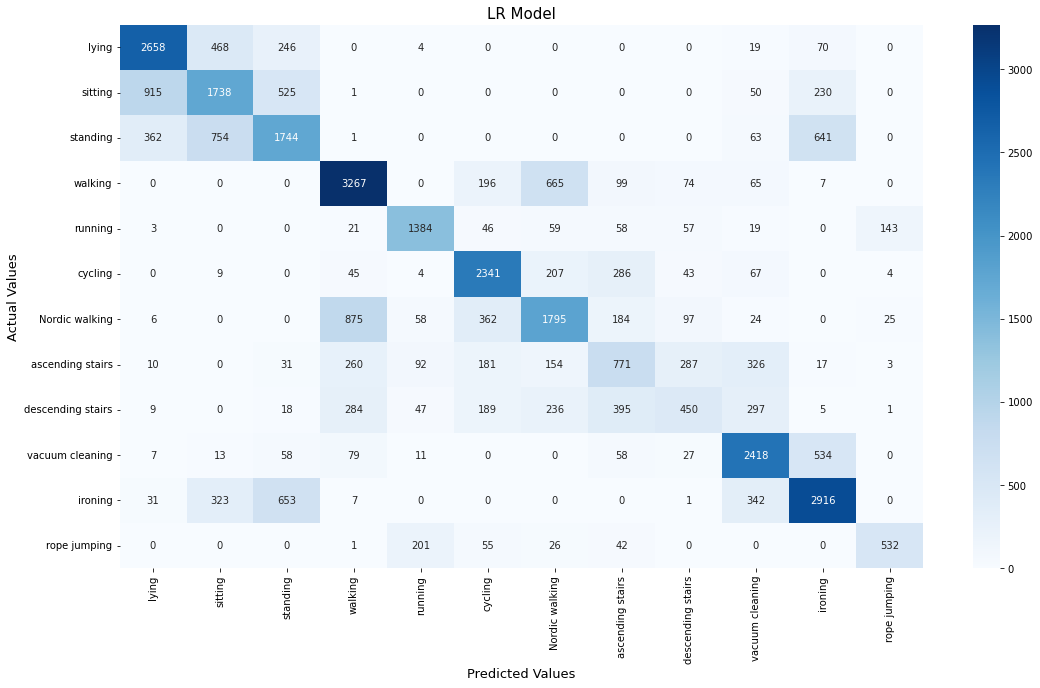

In [43]:
#Visualising confusion matrix
plot_confusion_matrix(y_test,LR_model_yPred,"LR Model")

#### ✲ Logistic Regression with PCA

In [44]:
%%time
#Fitting train data into the LR model for training
LR_model.fit(x_trainPCA,y_train)

CPU times: user 21.6 s, sys: 8.64 s, total: 30.3 s
Wall time: 5.04 s


LogisticRegression()

In [45]:
%%time
#Using LR model to predict activities
LR_model_yPredPCA = LR_model.predict(x_testPCA)
print(len(LR_model_yPredPCA))
print(len(y_test))
print(LR_model_yPredPCA[0:5])
print(y_test[0:5])

35482
35482
[ 6  4  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64
CPU times: user 11.3 ms, sys: 7.06 ms, total: 18.3 ms
Wall time: 3.69 ms


In [46]:
#Checking the results of the prediction using the LR model
metric_detail(y_test,LR_model_yPredPCA)

Model Accuracy: 32.52% 
Model Precision: 30.22% 
Model Recall: 29.53% 
Model F1: 26.82%


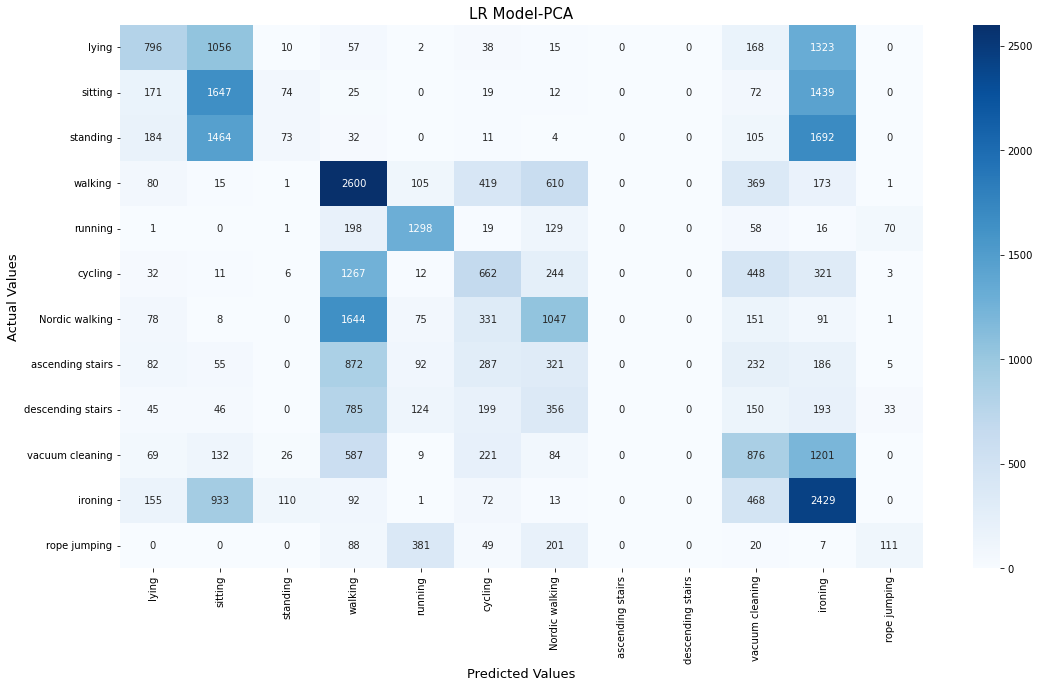

In [47]:
plot_confusion_matrix(y_test,LR_model_yPredPCA,"LR Model-PCA")

As seen from the results above, the time taken was slightly more when the PCA dataset was used. More importantly, the metric scores obtained with the PCA data was lower than what was obtained with the full data.  

### ⦿ 5.4 Linear Support Vector Classifier
Support Vector Classifier is a supervised machine learning algorithm that can be used for classification tasks. It works by finding the hyperplane in a high-dimensional space that maximally separates the classes. SVC is a type of linear classifier, meaning it makes predictions based on a linear combination of the input features.  

First the model object is created, then trained with the train dataset. Next the model would be used to predict the activity ID, and finally the model's metrics would be presented for analysis.  

This model would first be trained and tested with the whole train/test dataset and then the model would be trained and tested with the PCA dataset.



#### ✲ Support Vector Classifier

In [48]:
%%time
#Creating Model object
SVC_model = SVC(kernel="rbf")
#Training the SVC model
SVC_model.fit(x_train, y_train)

CPU times: user 6min 32s, sys: 842 ms, total: 6min 33s
Wall time: 6min 33s


SVC()

In [49]:
%%time
#Using SVC model to predict activities
SVC_model_yPred = SVC_model.predict(x_test)
print(len(SVC_model_yPred))
print(len(y_test))
print(SVC_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[ 7 13  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64
CPU times: user 5min 37s, sys: 494 ms, total: 5min 37s
Wall time: 8min 28s


In [50]:
#Checking the results of the prediction using the SCV model
metric_detail(y_test,SVC_model_yPred)

Model Accuracy: 76.98% 
Model Precision: 77.81% 
Model Recall: 75.42% 
Model F1: 76.13%


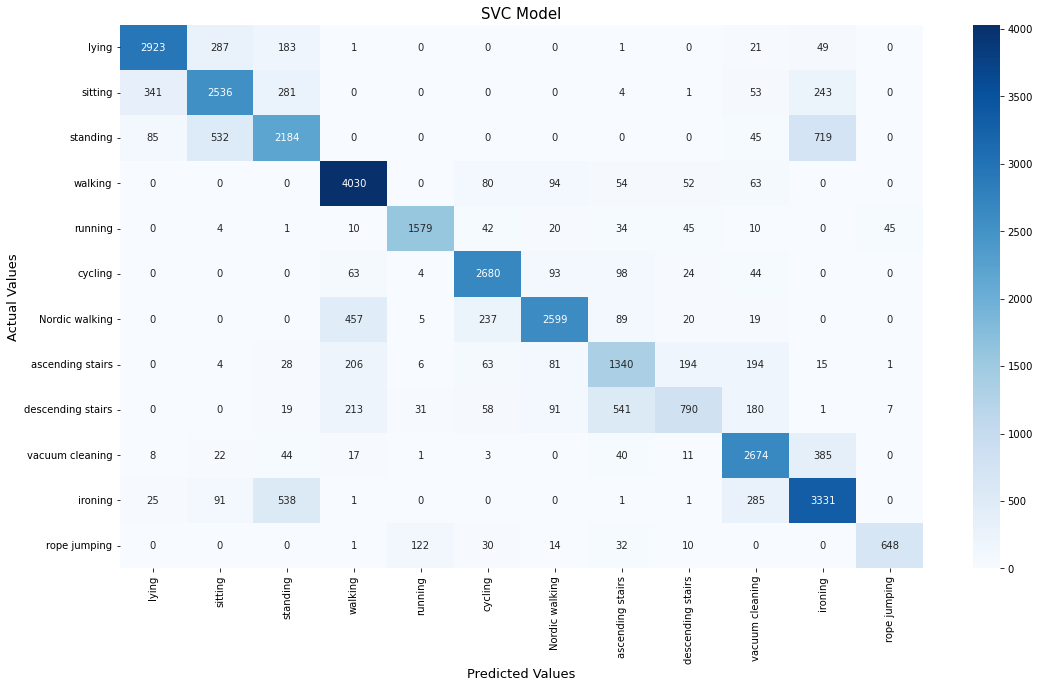

In [51]:
#Visualising confusion matric of SVC model
plot_confusion_matrix(y_test,SVC_model_yPred,"SVC Model")

#### ✲ Support Vector Classifier with PCA

In [52]:
%%time
#Training SVC Model with PCA data
SVC_model.fit(x_trainPCA, y_train)

CPU times: user 13min 17s, sys: 1.4 s, total: 13min 19s
Wall time: 13min 19s


SVC()

In [53]:
%%time
#Using SVC model to predict activities
SVC_model_yPredPCA = SVC_model.predict(x_testPCA)
print(len(SVC_model_yPredPCA))
print(len(y_test))
print(SVC_model_yPredPCA[0:5])
print(y_test[0:5])

35482
35482
[ 6  4  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64
CPU times: user 7min 33s, sys: 788 ms, total: 7min 33s
Wall time: 7min 33s


In [54]:
#Checking the results of the prediction using the SCV model
metric_detail(y_test,SVC_model_yPredPCA)

Model Accuracy: 47.42% 
Model Precision: 50.86% 
Model Recall: 45.26% 
Model F1: 45.1%


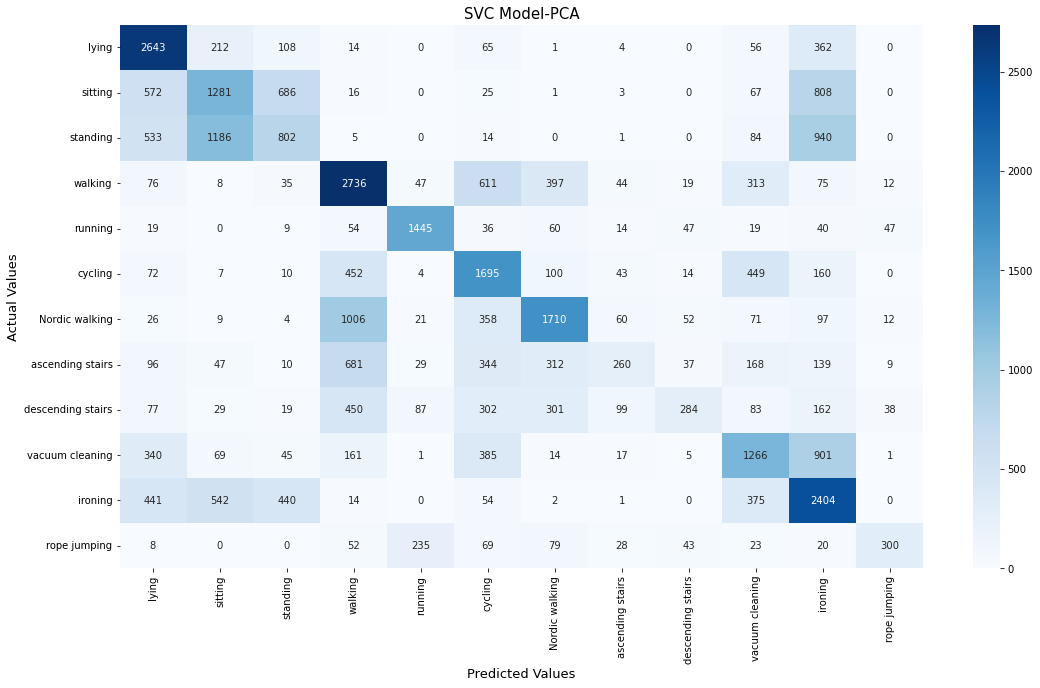

In [55]:
#Visualising confusion matric of SVC model with PCA
plot_confusion_matrix(y_test,SVC_model_yPredPCA,"SVC Model-PCA")

### ⦿ 5.5 Random Forest Classifier
Random Forest Classifier is a supervised machine learning algorithm that can be used for classification and regression tasks. It is an ensemble method, which means it combines the predictions of multiple individual models to make a final prediction.

First the model object is created, then trained with the train dataset. Next the model would be used to predict the activity ID, and finally the model's metrics would be presented for analysis.  

This model would first be trained and tested with the whole train/test dataset and then the model would be trained and tested with the PCA dataset.


#### ✲ Random Forest Classifier

In [56]:
%%time
#Creating Model Object
RFC_model = RandomForestClassifier()
#Training RFC Model
RFC_model.fit(x_train,y_train)

CPU times: user 27.7 s, sys: 50.6 ms, total: 27.8 s
Wall time: 27.8 s


RandomForestClassifier()

In [57]:
%%time
#Using RFC model to predict activities
RFC_model_yPred = RFC_model.predict(x_test)
print(len(RFC_model_yPred))
print(len(y_test))
print(RFC_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[12 13  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64
CPU times: user 451 ms, sys: 2.04 ms, total: 453 ms
Wall time: 452 ms


In [58]:
#Checking the results of the prediction using the RFC model
metric_detail(y_test,RFC_model_yPred)

Model Accuracy: 99.64% 
Model Precision: 99.54% 
Model Recall: 99.5% 
Model F1: 99.52%


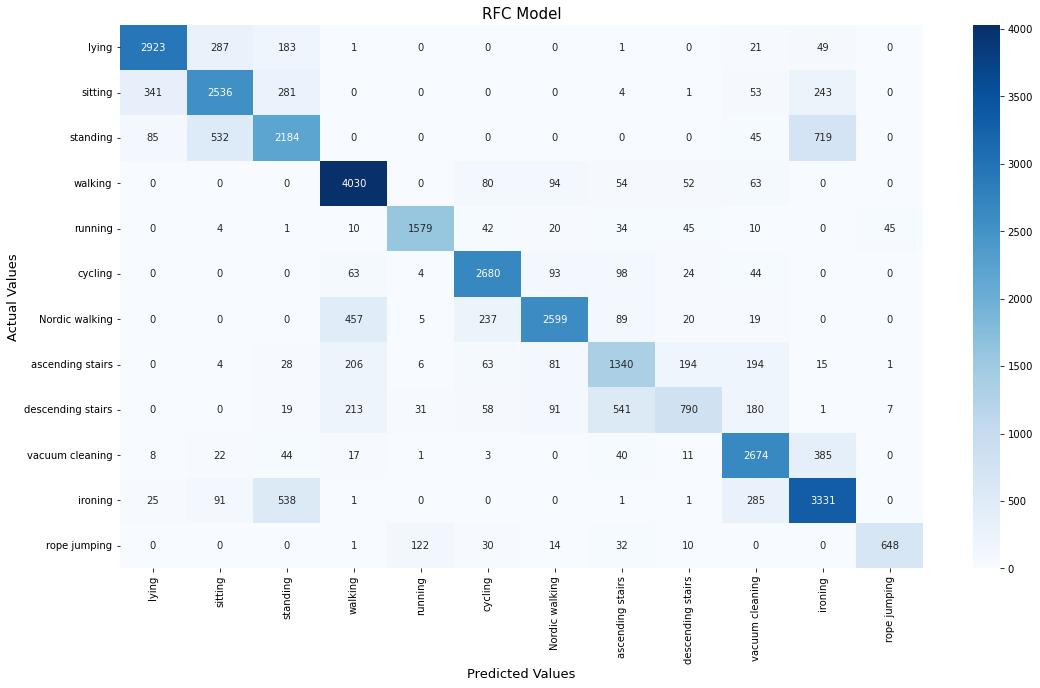

In [59]:
#Visualising confusion matric of RFC model
plot_confusion_matrix(y_test,SVC_model_yPred,"RFC Model")

#### ✲ Random Forest Classifier with PCA

In [60]:
%%time
#Training RFC Model
RFC_model.fit(x_trainPCA,y_train)

CPU times: user 35.3 s, sys: 558 ms, total: 35.9 s
Wall time: 35.9 s


RandomForestClassifier()

In [61]:
%%time
#Using RFC model to predict activities
RFC_model_yPredPCA = RFC_model.predict(x_testPCA)
print(len(RFC_model_yPredPCA))
print(len(y_test))
print(RFC_model_yPredPCA[0:5])
print(y_test[0:5])

35482
35482
[ 6  4  2 17 24]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64
CPU times: user 905 ms, sys: 211 ms, total: 1.12 s
Wall time: 1.2 s


In [62]:
#Checking the results of the prediction using the RFC model
metric_detail(y_test,RFC_model_yPredPCA)

Model Accuracy: 54.61% 
Model Precision: 53.93% 
Model Recall: 52.35% 
Model F1: 52.48%


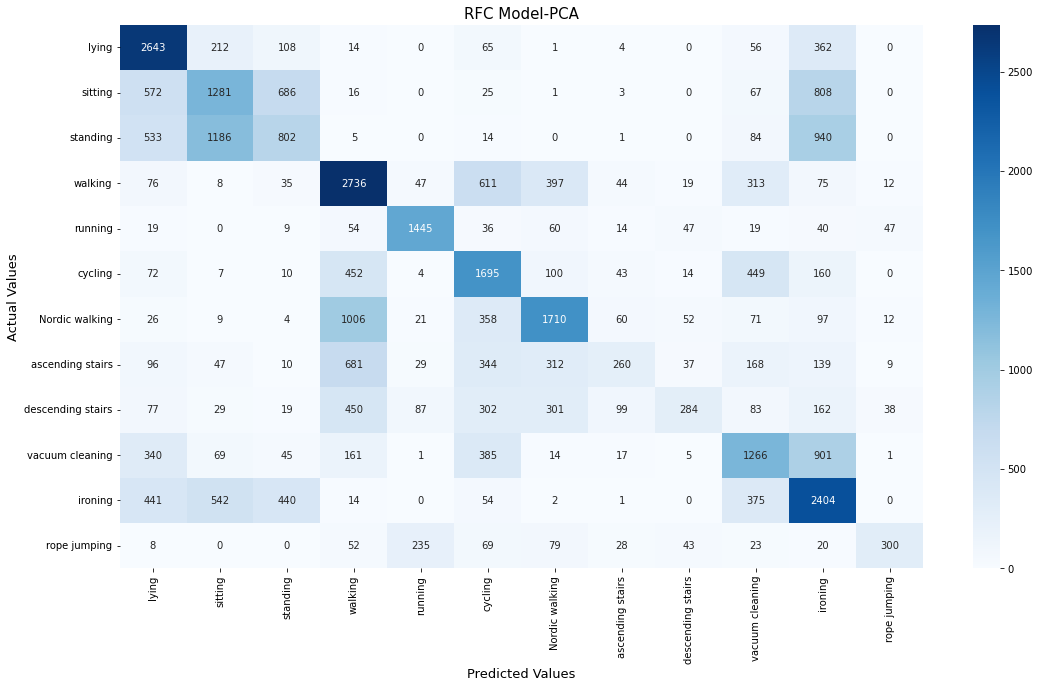

In [63]:
#Visualising confusion matric of RFC model with PCA
plot_confusion_matrix(y_test,SVC_model_yPredPCA,"RFC Model-PCA")

### ⦿ 5.6 Choosing the best Model and Attributes

From the three models tested in the previous section;  
Logistic regression had the best time but the least accuracy. Support vector classifier had a good accuracy but took the most time. While the random forest classifier model perfomed best in terms of accuracy and time. Also, dimension reduction with PCA did not improve execution time and decreased model accuracy significantly. Therefore, RFC would be selected as the best model but without using PCA going forward. In the next steps, the best combination of attributes would be selected.

#### ✲ RFC without Angular Velocity

In [64]:
#removing gyroscope data, i.e angular velocity
pamapV = pamapIV.drop(["timeStamp","subjectID","handGyr","chestGyr","ankleGyr"], axis=1)

#creating a features dataframe
pamap_feat = pamapV.drop(["activityID"], axis=1)

#creating a target dataframe
pamap_targ = pamapV["activityID"]

#RobustScaler used as data is skewed
scaler = RobustScaler()

#train test split
x_train, x_test, y_train, y_test = train_test_split(pamap_feat, pamap_targ, test_size=0.2,
                                                    random_state=45)

#scaling train dataset
x_train = scaler.fit_transform(x_train)

#scaling test dataset using the same scalar object
x_test = scaler.transform(x_test)

In [65]:
#Fitting train data into the RFC model for training
RFC_model.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
#Using RFC model to predict activities
RFC_model_yPred = RFC_model.predict(x_test)
print(len(RFC_model_yPred))
print(len(y_test))
print(RFC_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[13 13  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64


In [67]:
#Checking the results of the prediction from the RFC model
metric_detail(y_test,RFC_model_yPred)

Model Accuracy: 99.58% 
Model Precision: 99.47% 
Model Recall: 99.45% 
Model F1: 99.46%


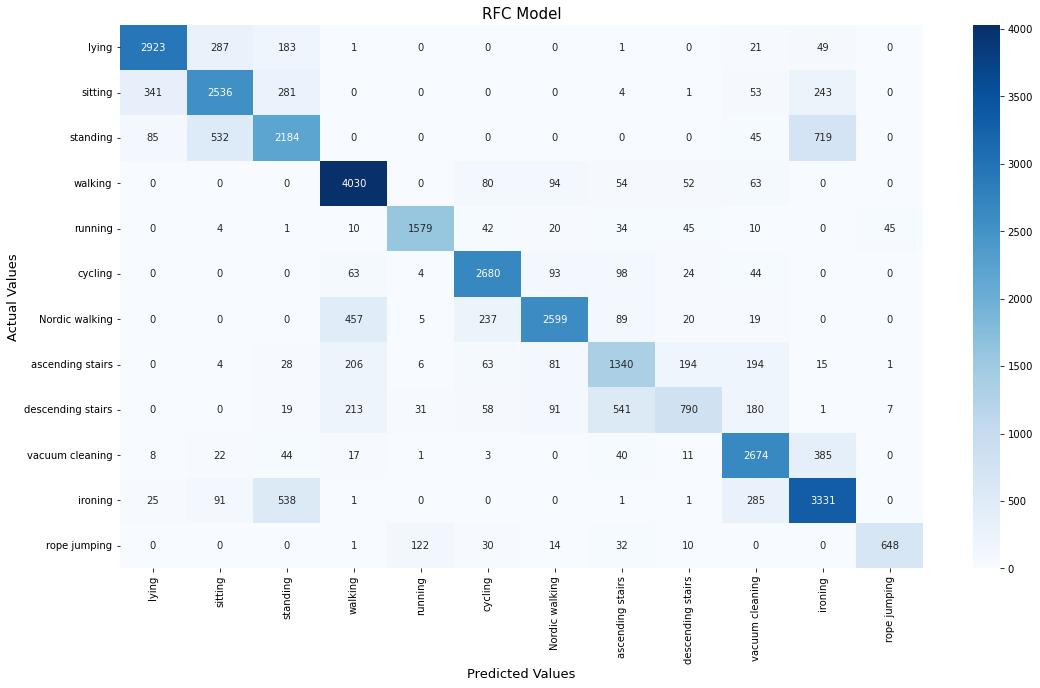

In [68]:
#Visualising confusion matric of RFC model
plot_confusion_matrix(y_test,SVC_model_yPred,"RFC Model")

#### ✲ RFC without Temperature

In [69]:
#removing temperature from the dataset
pamapV = pamapIV.drop(["timeStamp","subjectID","handTemp","chestTemp","ankleTemp"], axis=1)

#creating a features dataframe
pamap_feat = pamapV.drop(["activityID"], axis=1)

#creating a target dataframe
pamap_targ = pamapV["activityID"]

#RobustScaler used as data is skewed
scaler = RobustScaler()

#train test split
x_train, x_test, y_train, y_test = train_test_split(pamap_feat, pamap_targ, test_size=0.2,
                                                    random_state=45)

#scaling train dataset
x_train = scaler.fit_transform(x_train)

#scaling test dataset using the same scalar object
x_test = scaler.transform(x_test)

In [70]:
#Fitting train data into the RFC model for training
RFC_model.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
#Using RFC model to predict activities
RFC_model_yPred = RFC_model.predict(x_test)
print(len(RFC_model_yPred))
print(len(y_test))
print(RFC_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[12 13  2 17 24]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64


In [72]:
#Checking the results of the prediction using the RFC model
metric_detail(y_test,RFC_model_yPred)

Model Accuracy: 72.98% 
Model Precision: 73.69% 
Model Recall: 71.33% 
Model F1: 72.14%


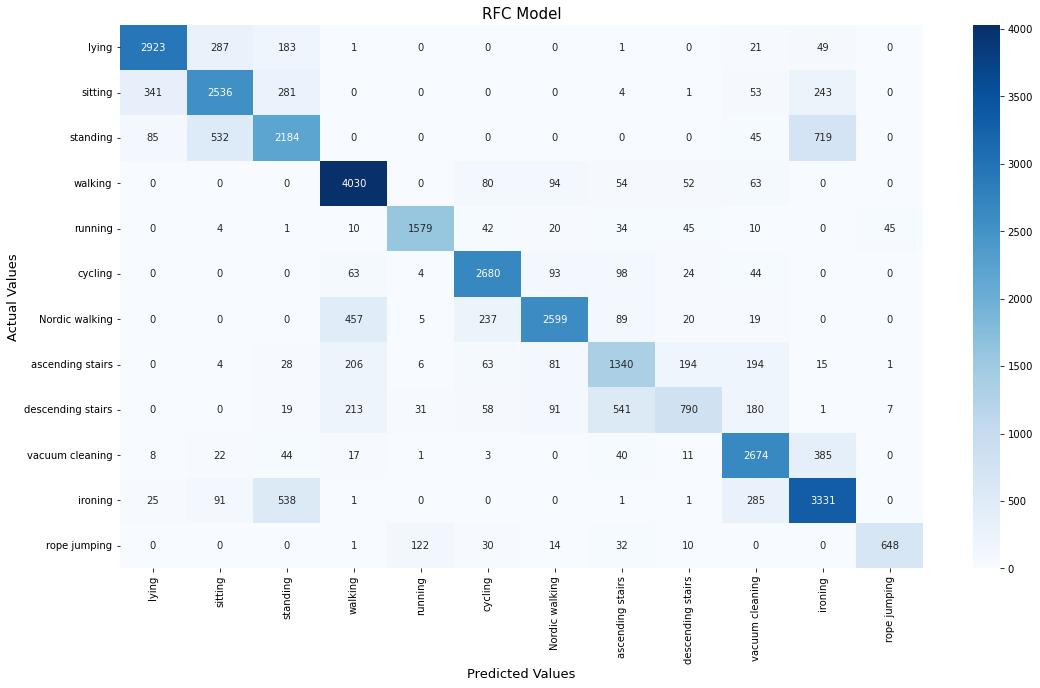

In [73]:
#Visualising confusion matric of RFC model
plot_confusion_matrix(y_test,SVC_model_yPred,"RFC Model")

#### ✲ RFC without Acceleration

In [74]:
#removing acceleration from the dataset
pamapV = pamapIV.drop(["timeStamp","subjectID","handAcc","chestAcc","ankleAcc"], axis=1)

#creating a features dataframe
pamap_feat = pamapV.drop(["activityID"], axis=1)

#creating a target dataframe
pamap_targ = pamapV["activityID"]

#RobustScaler used as data is skewed
scaler = RobustScaler()

#train test split
x_train, x_test, y_train, y_test = train_test_split(pamap_feat, pamap_targ, test_size=0.2,
                                                    random_state=45)

#scaling train dataset
x_train = scaler.fit_transform(x_train)

#scaling test dataset using the same scalar object
x_test = scaler.transform(x_test)

In [75]:
#Fitting train data into the RFC model for training
RFC_model.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
#Using RFC model to predict activities
RFC_model_yPred = RFC_model.predict(x_test)
print(len(RFC_model_yPred))
print(len(y_test))
print(RFC_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[12 13  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64


In [77]:
#Checking the results of the prediction using the RFC model
metric_detail(y_test,RFC_model_yPred)

Model Accuracy: 99.66% 
Model Precision: 99.58% 
Model Recall: 99.54% 
Model F1: 99.56%


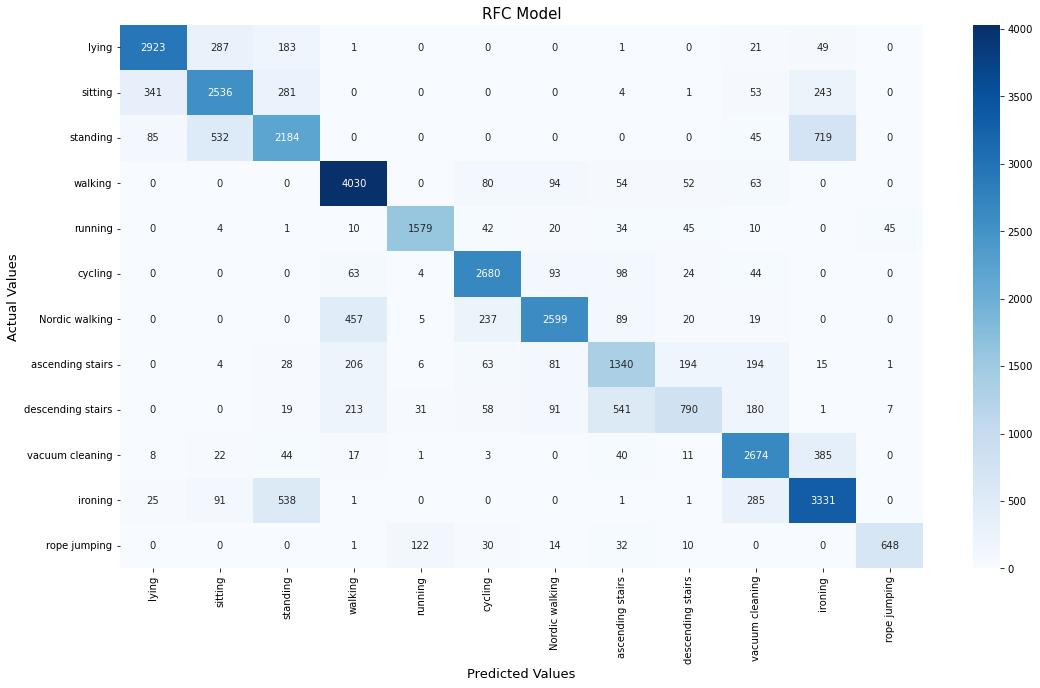

In [78]:
#Visualising confusion matric of RFC model
plot_confusion_matrix(y_test,SVC_model_yPred,"RFC Model")

#### ✲ RFC using only Hand data

In [79]:
#removing ankle and chest from the dataset
pamapV = pamapIV.drop(["timeStamp","subjectID","chestTemp","chestAcc","chestGyr",
                       "ankleTemp","ankleAcc","ankleGyr"], axis=1)

#creating a features dataframe
pamap_feat = pamapV.drop(["activityID"], axis=1)

#creating a target dataframe
pamap_targ = pamapV["activityID"]

#RobustScaler used as data is skewed
scaler = RobustScaler()

#train test split
x_train, x_test, y_train, y_test = train_test_split(pamap_feat, pamap_targ, test_size=0.2,
                                                    random_state=45)

#scaling train dataset
x_train = scaler.fit_transform(x_train)

#scaling test dataset using the same scalar object
x_test = scaler.transform(x_test)

In [80]:
#Fitting train data into the RFC model for training
RFC_model.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
#Using RFC model to predict activities
RFC_model_yPred = RFC_model.predict(x_test)
print(len(RFC_model_yPred))
print(len(y_test))
print(RFC_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[12 13  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64


In [82]:
#Checking the results of the prediction using the RFC model
metric_detail(y_test,RFC_model_yPred)

Model Accuracy: 91.27% 
Model Precision: 91.4% 
Model Recall: 90.84% 
Model F1: 91.11%


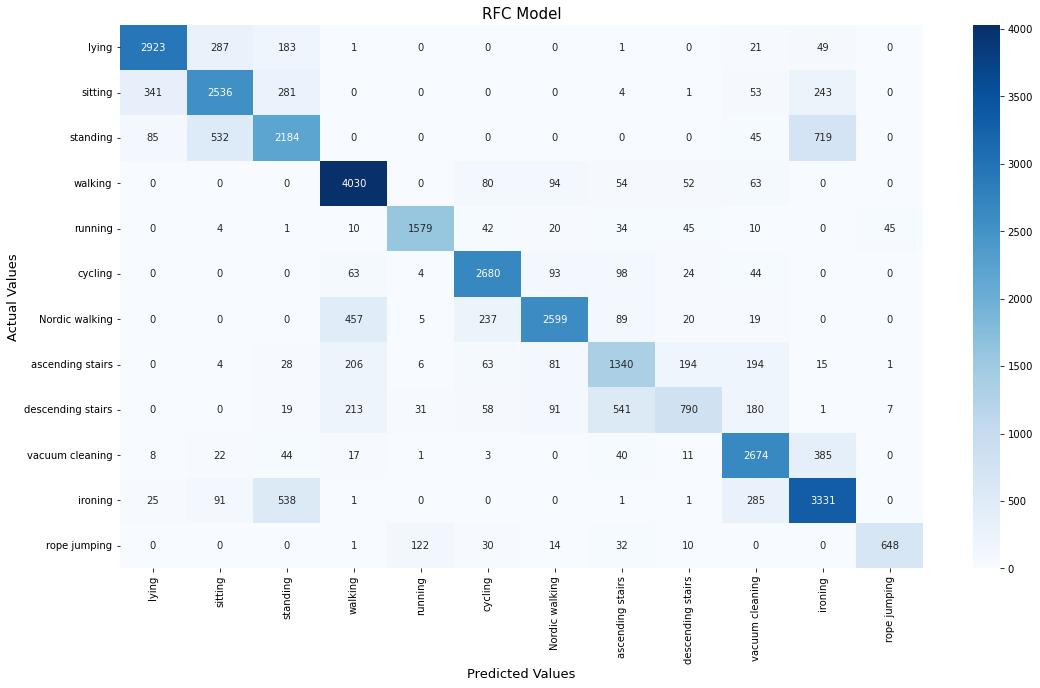

In [83]:
#Visualising confusion matric of RFC model
plot_confusion_matrix(y_test,SVC_model_yPred,"RFC Model")

#### ✲ RFC using only Chest data

In [84]:
#removing hand and ankle from the dataset
pamapV = pamapIV.drop(["timeStamp","subjectID","handTemp","handAcc","handGyr",
                       "ankleTemp","ankleAcc","ankleGyr"], axis=1)

#creating a features dataframe
pamap_feat = pamapV.drop(["activityID"], axis=1)

#creating a target dataframe
pamap_targ = pamapV["activityID"]

#RobustScaler used as data is skewed
scaler = RobustScaler()

#train test split
x_train, x_test, y_train, y_test = train_test_split(pamap_feat, pamap_targ, test_size=0.2,
                                                    random_state=45)

#scaling train dataset
x_train = scaler.fit_transform(x_train)

#scaling test dataset using the same scalar object
x_test = scaler.transform(x_test)

In [85]:
#Fitting train data into the RFC model for training
RFC_model.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
#Using RFC model to predict activities
RFC_model_yPred = RFC_model.predict(x_test)
print(len(RFC_model_yPred))
print(len(y_test))
print(RFC_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[12 12  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64


In [87]:
#Checking the results of the prediction using the RFC model
metric_detail(y_test,RFC_model_yPred)

Model Accuracy: 90.27% 
Model Precision: 90.44% 
Model Recall: 89.99% 
Model F1: 90.2%


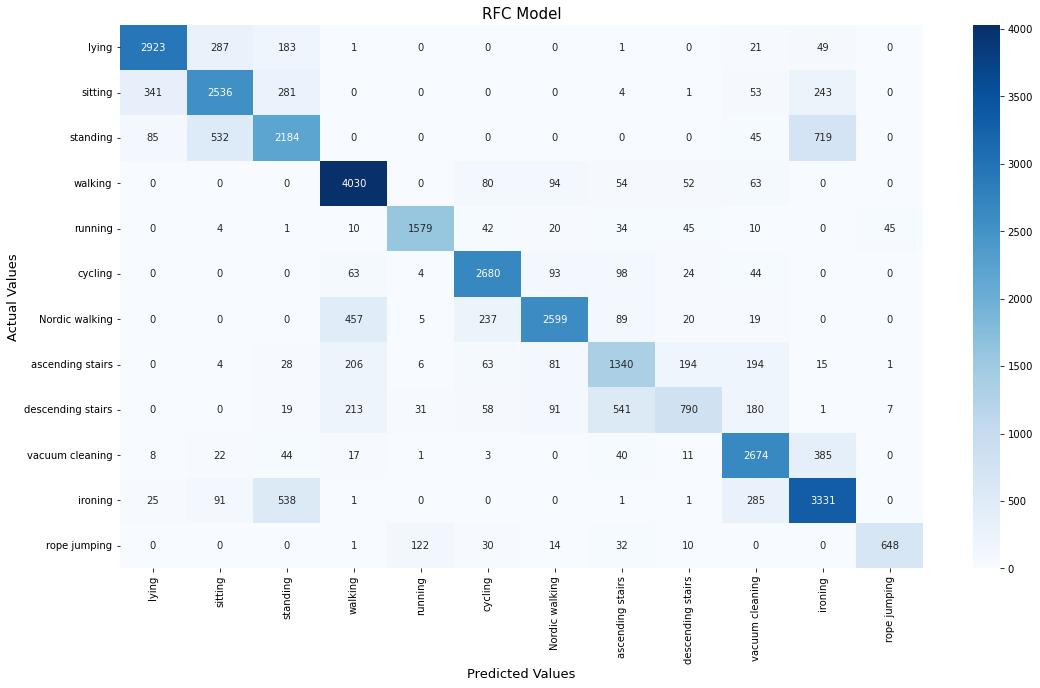

In [88]:
#Visualising confusion matric of RFC model
plot_confusion_matrix(y_test,SVC_model_yPred,"RFC Model")

#### ✲ RFC using only Ankle data

In [89]:
#removing hand and chest from the dataset
pamapV = pamapIV.drop(["timeStamp","subjectID","handTemp","handAcc","handGyr",
                       "ankleTemp","ankleAcc","ankleGyr"], axis=1)

#creating a features dataframe
pamap_feat = pamapV.drop(["activityID"], axis=1)

#creating a target dataframe
pamap_targ = pamapV["activityID"]

#RobustScaler used as data is skewed
scaler = RobustScaler()

#train test split
x_train, x_test, y_train, y_test = train_test_split(pamap_feat, pamap_targ, test_size=0.2,
                                                    random_state=45)

#scaling train dataset
x_train = scaler.fit_transform(x_train)

#scaling test dataset using the same scalar object
x_test = scaler.transform(x_test)

In [90]:
#Fitting train data into the RFC model for training
RFC_model.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
#Using RFC model to predict activities
RFC_model_yPred = RFC_model.predict(x_test)
print(len(RFC_model_yPred))
print(len(y_test))
print(RFC_model_yPred[0:5])
print(y_test[0:5])

35482
35482
[12 12  2 17  5]
1012462    12
1602464    13
1468933     2
2546620    17
2116929     5
Name: activityID, dtype: int64


In [92]:
#Checking the results of the prediction using the RFC model
metric_detail(y_test,RFC_model_yPred)

Model Accuracy: 90.32% 
Model Precision: 90.42% 
Model Recall: 89.98% 
Model F1: 90.19%


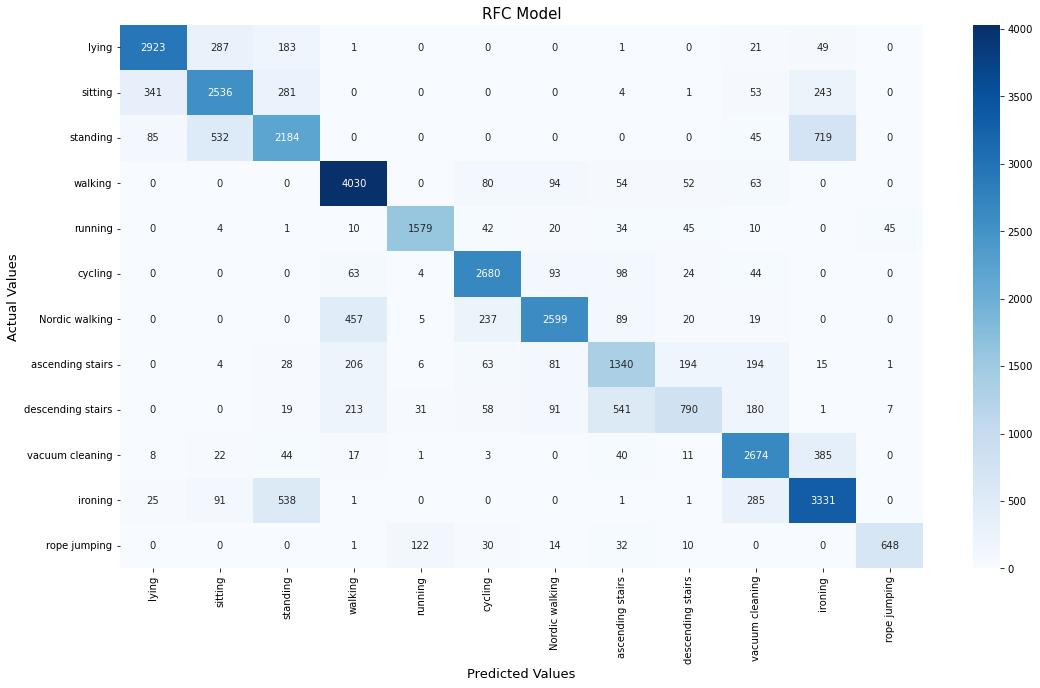

In [93]:
#Visualising confusion matric of RFC model
plot_confusion_matrix(y_test,SVC_model_yPred,"RFC Model")

From the results obtained in this section, removing angular velocity or acceleration did not reduce accuracy significantly, however removing temperature reduced accuracy by almost 30%. Using only the data from the hand IMU achieved an accuracy of 91%, while data from the chest and ankle IMU alone achieved an accuracy of 90% individually.

### ⦿ 5.7 Cross Validation

Although the RFC model had a good performance in the last section, the results obtained may not be the true representation since the model was trained on a particular part of the dataset. By using cross validation, different samples can be generated and then the RFC model would be trained and tested with these different samples and then the mean of the results from these different tests can represent its final accuracy. This would be implemented in this section. K would be set to 10(10 different sample).

In [94]:
classifiers = [RandomForestClassifier()]

scores = []
for classifier in classifiers:
    #Cross Validating accuracy
    a = accuracy_score(y_train, cross_val_predict(classifier,x_train,y_train,cv=10))
    #Calculating mean square errors
    e = cross_val_score(classifier,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
    s = np.sqrt(-e)
    #F1 score
    f = cross_val_score(classifier,x_test,y_test,scoring="f1_macro",cv=10)
    
    scores.append([classifier.__class__.__name__,a,s.mean(), f.mean()])

scores_dataFrame = pd.DataFrame(columns = ["Classifier","Accuracy","Mean Square Error","F1"],
                                data = scores)

display(scores_dataFrame)

,Classifier,Accuracy,Mean Square Error,F1
0,RandomForestClassifier,0.905824,2.657641,0.870519


The mean accuracy score for the RFC model is 90.58%. This is still higher than what the LR and SVC models scored individually. 

---

## ◉ 6. Conclusion

PAMAP2 Physical Activity Monitoring dataset was provided to gain actionable insights that could help develop hardware and/or software which can determine the activity carried out by an individual. In the course of this report, data cleaning was carried out to handle dirty and missing data. Exploratory data analysis was carried out to draw observations from the data. These observations were put to test in the hypothesis testing section. And finally, three supervised machine learning modelling was carried out in order to select a model that is most suitable for prediction based on the dataset.

To conclude this report, the following insights have been drawn as regards developing hardware and/or software which can determine the activity carried out by an individual;

⦿The classifier to be used for this device should be Random Forest Classifier.  
⦿The hardware to be developed would function best if situated on the hand.  
⦿The most important attributes for prediction would be heart rates and temperature, then acceleration and angular velocity could be included if desired.

This report was based on 9 subjects, for better predictions, more tests with more subjects is suggested.

## ◉ 7. References  

1. University of Sussex-DSRM Lecture Note
2. University of Sussex-DSRM Lab Note
3. PerformedActivitiesSummary.pdf, PAMAP2 Dataset Documentation.
4. SubjectInformation.pdf, PAMAP2 Dataset Documentation.
5. readme.pdf, PAMAP2 Dataset Documentation
6. https://www.physio-pedia.com/Cycling_Biomechanics  
7. https://en.wikipedia.org/wiki/Heart_rate  
8. https://en.wikipedia.org/wiki/Acceleration  
9. https://en.wikipedia.org/wiki/Angular_velocity  
10. https://en.wikipedia.org/wiki/Temperature  
11. https://en.wikipedia.org/wiki/Confusion_matrix


In [96]:
filepath="DSRM Report_2.ipynb"
with io.open(filepath, 'r', encoding='utf-8') as f:
    nb=read(f, 4)
word_count = 0
for cell in nb['cells']:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count))

Submission length is 4006
